In [173]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [174]:
df = pd.read_csv('https://raw.githubusercontent.com/dinaldoap/jit-sdp-data/master/brackets.csv')
df.head()

,commit_hash,author_name,author_date_unix_timestamp,author_email,author_date,commit_message,fix,classification,linked,contains_bug,...,nuc,exp,rexp,sexp,glm_probability,rf_probability,repository_id,issue_id,issue_date,issue_type
0,5f406086936d2abf1392b0f77db246b308715d6d,Narayani,1574927837,narayani@adobe.com,Thu Nov 28 13:27:17 2019 +0530,Merge pull request #14985 from adobe/alf_local...,NaN,Merge,False,False,...,0.0,0.0,0.000000,0.0,0.173803,0.000,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
1,95626cc3650dcd00e886670d80307b8f710d6168,walf,1574926230,walf@adobe.com,Wed Nov 27 23:30:30 2019 -0800,Updated by ALF automation.,False,None,False,False,...,1.0,9.0,1.075033,8.0,0.464372,0.286,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
2,8f26cd850e648d6c4dd04cdfa69119a7feda0867,walf,1574915324,walf@adobe.com,Wed Nov 27 20:28:44 2019 -0800,Updated by ALF automation.,False,None,False,False,...,1.0,8.0,0.075033,7.0,0.459778,0.302,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
3,a7dda4aeab550d36bc2c0ca4ecfc29efda21f9ea,Narayani,1574757872,narayani@adobe.com,Tue Nov 26 14:14:32 2019 +0530,Merge pull request #14729 from adobe/alf_local...,NaN,Merge,False,False,...,0.0,0.0,0.000000,0.0,0.173803,0.000,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN
4,8a806ec41b613d70b26005e2c4907b021a41e744,Gautam Jha,1574315174,gjha@adobe.com,Thu Nov 21 11:16:14 2019 +0530,Moving command line port validation errors to ...,False,None,False,False,...,2.0,4.0,2.500000,2.0,0.640227,0.496,3dc71fdd-a705-47f1-9685-0dbc873af923,NaN,NaN,NaN


In [175]:
df_preprocess = df.copy()
label_col = 'contains_bug'
nullable_cols = ['fix']
preprocess_cols = ['commit_message'] + nullable_cols + [label_col]
df_preprocess = df[preprocess_cols].copy()
# filter rows with missing data 
df_preprocess = df_preprocess.dropna(subset=['fix'])
df_preprocess.head()


,commit_message,fix,contains_bug
1,Updated by ALF automation.,False,False
2,Updated by ALF automation.,False,False
4,Moving command line port validation errors to ...,False,False
5,Finalizing strings for gkit (#14976),False,False
6,Remove space between localhost: and port in in...,False,False


In [176]:
def filter_commits(data, contains_bug):
    return data[data['contains_bug'] == contains_bug]

In [177]:
df_bug = filter_commits(df_preprocess, 1)
df_normal = filter_commits(df_preprocess, 0)
print(df_bug.head())
print(df_normal.head())

commit_message   fix  contains_bug
18  ALF Automation (#14721) * Updated by ALF autom...  True          True
19  ALF Automation (#14702) * Updated by ALF autom...  True          True
23  LSP Find References Feature (#14693) * LSP Fin...  True          True
24  Capability to Support Document & Project Symbo...  True          True
25  Adding Code Hints Description Box for handling...  True          True
                                      commit_message    fix  contains_bug
1                        Updated by ALF automation.   False         False
2                        Updated by ALF automation.   False         False
4  Moving command line port validation errors to ...  False         False
5              Finalizing strings for gkit (#14976)   False         False
6  Remove space between localhost: and port in in...  False         False


In [178]:
def extract_text(data):
    text = [message for message in data['commit_message']]
    return " ".join(text)

In [179]:
text_bug = extract_text(df_bug)
text_normal = extract_text(df_normal)
print(text_bug[:100])
print(text_normal[:100])

ALF Automation (#14721) * Updated by ALF automation.

* Fixing the LANGUAGE_TOOLS_PREFERENCES key 
Updated by ALF automation.  Updated by ALF automation.  Moving command line port validation errors t


In [180]:
def plot_wordcloud(data):
    '''
    data: str with text or iterable with (name, frequency)
    '''
    stopwords = set(STOPWORDS)
    #stopwords.update(['Add', 'Added', 'Update', 'Updated', 'change', 'Remove', 'Fix', 'ALF', 'use', 'file'])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', random_state=42)
    
    if type(data) == str:
        wordcloud = wordcloud.generate(data)
    else:
        wordcloud = wordcloud.generate_from_frequencies(data)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

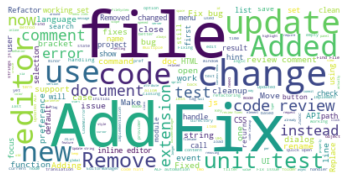

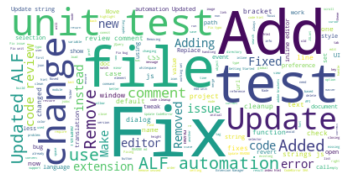

In [181]:
plot_wordcloud(text_bug)
plot_wordcloud(text_normal)

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf = vectorizer.fit_transform(df_preprocess['commit_message'])
features_cols = vectorizer.get_feature_names()
print(vectorizer.get_feature_names())

['add', 'added', 'adding', 'alf', 'api', 'automation', 'bar', 'based', 'brackets', 'bug', 'case', 'change', 'changed', 'changes', 'check', 'cleanup', 'close', 'code', 'codemirror', 'color', 'comment', 'comments', 'commit', 'css', 'default', 'dialog', 'directory', 'docs', 'document', 'don', 'editor', 'error', 'errors', 'event', 'events', 'extension', 'extensions', 'file', 'files', 'fix', 'fixed', 'fixes', 'fixing', 'focus', 'function', 'getting', 'handling', 'hints', 'html', 'initial', 'inline', 'instead', 'issue', 'issues', 'js', 'jslint', 'json', 'key', 'language', 'line', 'list', 'live', 'make', 'menu', 'minor', 'new', 'node', 'open', 'path', 'project', 'quick', 'remove', 'removed', 'rename', 'replace', 'revert', 'review', 'search', 'selection', 'set', 'sha', 'sprint', 'string', 'strings', 'support', 'test', 'tests', 'text', 'translation', 'tree', 'typo', 'ui', 'unit', 'update', 'updated', 'use', 'user', 'using', 'work', 'working']


In [183]:
df_freq = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df_preprocess.index)
df_freq = pd.concat([df_freq, df_preprocess[['contains_bug']]], axis='columns')
df_freq.head()

,add,added,adding,alf,api,automation,bar,based,brackets,bug,...,ui,unit,update,updated,use,user,using,work,working,contains_bug
1,0.0,0.0,0.0,0.595147,0.0,0.598657,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.536106,0.0,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.0,0.595147,0.0,0.598657,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.536106,0.0,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.620948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,False


In [184]:
def filter_drop(data, contains_bug):
    return filter_commits(data, contains_bug).drop(['contains_bug'], axis='columns')

In [185]:
df_freq_bug = filter_drop(df_freq, 1)
df_freq_normal = filter_drop(df_freq, 0)
print(df_freq_bug.mean().head())
print(df_freq_normal.mean().head())

add       0.050586
added     0.030662
adding    0.010434
alf       0.006490
api       0.013086
dtype: float64
add       0.051201
added     0.025178
adding    0.011747
alf       0.024890
api       0.003275
dtype: float64


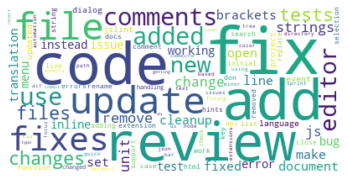

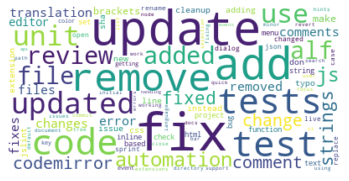

In [186]:
plot_wordcloud(df_freq_bug.mean())
plot_wordcloud(df_freq_normal.mean())

In [187]:
from scipy.stats import ttest_ind
statistics = []
for column in df_freq_bug.columns:
    statistic, pvalue = ttest_ind(df_freq_bug[column], df_freq_normal[column], equal_var=False)
    statistics.append(statistic)
sr_diff = pd.Series(statistics, index=df_freq_bug.columns)
print(sr_diff.head())

add       -0.182646
added      2.095835
adding    -0.778899
alf      -10.971356
api        6.192987
dtype: float64


In [188]:
sr_diff.sort_values(ascending=False)

review         7.220476
code           6.787226
working        6.418767
fixes          6.326459
api            6.192987
                ...    
test          -8.130167
updated       -8.836408
codemirror    -8.864541
alf          -10.971356
automation   -11.007009
Length: 100, dtype: float64

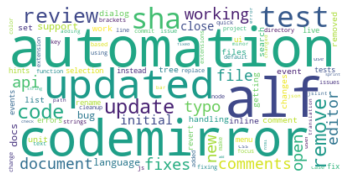

In [189]:
plot_wordcloud(sr_diff.abs())

In [190]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [191]:
X = df_freq[features_cols].copy()
y = df_freq[label_col].copy()
y = y.rename('y')

In [192]:
def format_to_plot(X, y, trans):
    pts = trans.fit_transform(X)
    pts = pd.DataFrame(pts, index=X.index, columns=['x1', 'x2'])
    pts = pd.concat([pts, y], axis='columns')
    pts = pts.reset_index()
    return pts.rename(columns={'index': 'timestep'})
    
def plot_by_label(data):
  plt.figure(figsize=(15,15))
  sns.scatterplot(x="x1", y="x2", hue='y', data=data)
  plt.show()


In [193]:
tsne_pts = format_to_plot(X, y, TSNE(n_components=2, random_state=42))

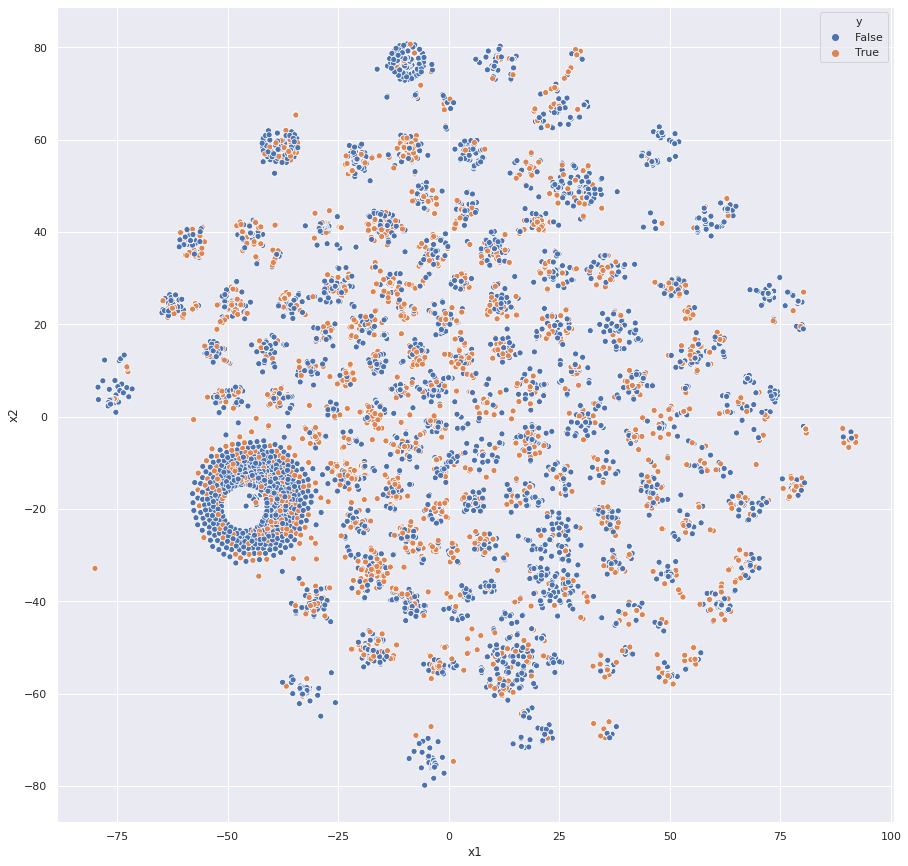

In [194]:
plot_by_label(tsne_pts)